In [42]:
#############################################################################################
# importing the dependency
#############################################################################################

import pandas as pd
from sklearn.impute import KNNImputer
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsRegressor
from sklearn.preprocessing import StandardScaler

%matplotlib inline

In [5]:
#############################################################################################
# Loading the datasets
#############################################################################################

q1 = pd.read_csv("data/q1_miss.csv")
q2 = pd.read_csv("data/q2_miss.csv")
q3 = pd.read_csv("data/q3_miss.csv")
q4 = pd.read_csv("data/q4_miss.csv")
q5 = pd.read_csv("data/q5_miss.csv")
q6 = pd.read_csv("data/q6_miss.csv")
q7 = pd.read_csv("data/q7_miss.csv")
q8 = pd.read_csv("data/q8_miss.csv")

f1 = pd.read_csv("data/f1_miss.csv")
f2 = pd.read_csv("data/f2_miss.csv")
f3 = pd.read_csv("data/f3_miss.csv")
f4 = pd.read_csv("data/f4_miss.csv")
f5 = pd.read_csv("data/f5_miss.csv")
f6 = pd.read_csv("data/f6_miss.csv")


In [6]:
#############################################################################################
# Formatting the date to date time format
#############################################################################################

f1['Time'] = pd.to_datetime(f1['Time'])
f2['Time'] = pd.to_datetime(f2['Time'])
f3['Time'] = pd.to_datetime(f3['Time'])
f4['Time'] = pd.to_datetime(f4['Time'])
f5['Time'] = pd.to_datetime(f5['Time'])
f6['Time'] = pd.to_datetime(f6['Time'])

q1['date_time'] = pd.to_datetime(q1['date_time'])
q2['date_time'] = pd.to_datetime(q2['date_time'])
q3['date_time'] = pd.to_datetime(q3['date_time'])
q4['date_time'] = pd.to_datetime(q4['date_time'])
q5['date_time'] = pd.to_datetime(q5['date_time'])
q6['date_time'] = pd.to_datetime(q6['date_time'])
q7['date_time'] = pd.to_datetime(q7['date_time'])
q8['date_time'] = pd.to_datetime(q8['date_time'])

C:\Users\utkar\AppData\Local\Temp\ipykernel_4824\3584283064.py:5: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  f1['Time'] = pd.to_datetime(f1['Time'])
C:\Users\utkar\AppData\Local\Temp\ipykernel_4824\3584283064.py:6: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  f2['Time'] = pd.to_datetime(f2['Time'])
C:\Users\utkar\AppData\Local\Temp\ipykernel_4824\3584283064.py:7: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  f3['Time'] = pd.to_datetime(f3['Time'])
C:\Users\utkar\AppData\Local\Temp\ipykernel_4824\3584283064.py:8: UserWarning: Parsing dates in %d/%m/%Y %H:%M format when dayfirst=False (the default) was specified. Pass `da

In [49]:
def find_best_k_for_knn_imputer(df, missing_percentage=0.05, k_range=(1, 10), scale_data=True):
    """
    Function to find the best k value for KNN Imputer by introducing missing values,
    scaling the data, and comparing the imputed DataFrame with the original clean DataFrame.

    Parameters:
    - df: pd.DataFrame
        The input DataFrame with missing values introduced for imputation.
    - missing_percentage: float
        The percentage of data to randomly set as missing.
    - k_range: tuple
        The range of k values to test for KNN Imputer.
    - scale_data: bool
        Whether to scale the data before imputation. Default is True.

    Returns:
    - best_k: int
        The best k value with the lowest mean squared error.
    - best_score: float
        The mean squared error corresponding to the best k value.
    """

    # 1. Remove all NaNs from the DataFrame
    df_clean = df.dropna().reset_index(drop=True)

    # 2. Scale the data if needed
    if scale_data:
        scaler = StandardScaler()
        df_clean_scaled = pd.DataFrame(scaler.fit_transform(df_clean), columns=df_clean.columns)
    else:
        df_clean_scaled = df_clean.copy()

    # 3. Randomly remove a percentage of the data from the DataFrame
    df_missing = df_clean_scaled.copy()
    n_samples, n_features = df_clean_scaled.shape
    n_missing = int(n_samples * n_features * missing_percentage)

    # Randomly select indices to be removed
    missing_indices = [(np.random.randint(0, n_samples), np.random.randint(0, n_features)) for _ in range(n_missing)]
    for i, j in missing_indices:
        df_missing.iat[i, j] = np.nan

    # 4. Apply KNN Imputer with k in the specified range and find the best k
    best_k = None
    best_score = float('inf')

    # To store errors for each k
    errors = []

    for k in range(k_range[0], k_range[1] + 1):
        # Apply KNN imputer
        imputer = KNNImputer(n_neighbors=k)
        df_imputed_scaled = pd.DataFrame(imputer.fit_transform(df_missing), columns=df_missing.columns)

        # Calculate the error between the imputed and the original cleaned dataset
        mse = mean_squared_error(df_clean_scaled, df_imputed_scaled)
        errors.append(mse)

        # If this k has the lowest error, save it as the best k
        if mse < best_score:
            best_score = mse
            best_k = k

    # 5. Output the best k and the corresponding MSE
    print(f"Best k: {best_k} with MSE: {best_score}")

    # Plot the MSEs for each k
    plt.plot(range(k_range[0], k_range[1] + 1), errors, marker='o')
    plt.title('MSE for Different k values in KNN Imputer')
    plt.xlabel('k')
    plt.ylabel('Mean Squared Error')
    plt.show()

    return best_k, best_score



Best k: 10 with MSE: 0.019481017167714696


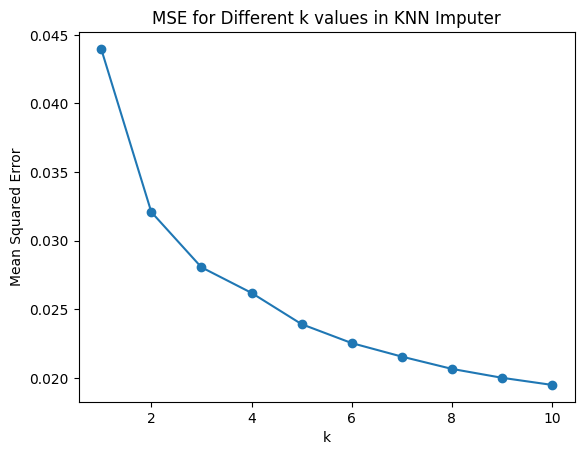

(10, np.float64(0.019481017167714696))

In [44]:
find_best_k_for_knn_imputer(f1.iloc[:,1:])

Best k: 5 with MSE: 0.01315788728862542


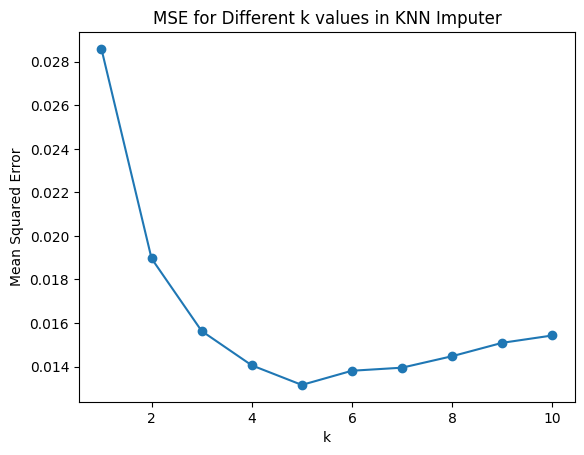

(5, np.float64(0.01315788728862542))

In [50]:
find_best_k_for_knn_imputer(f2.iloc[:,1:])

Best k: 10 with MSE: 0.008341538695048839


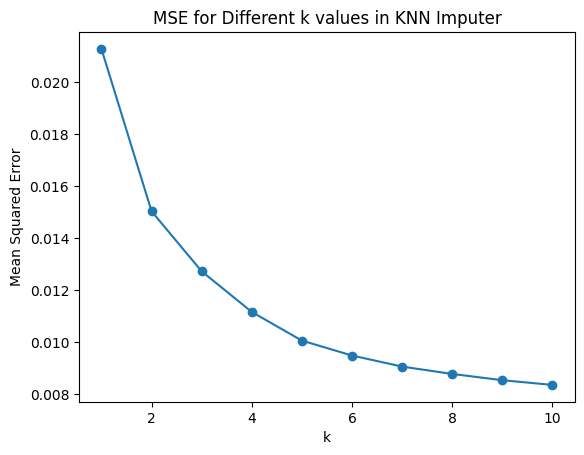

(10, np.float64(0.008341538695048839))

In [51]:
find_best_k_for_knn_imputer(f3.iloc[:,1:])

Best k: 10 with MSE: 0.00689352262982169


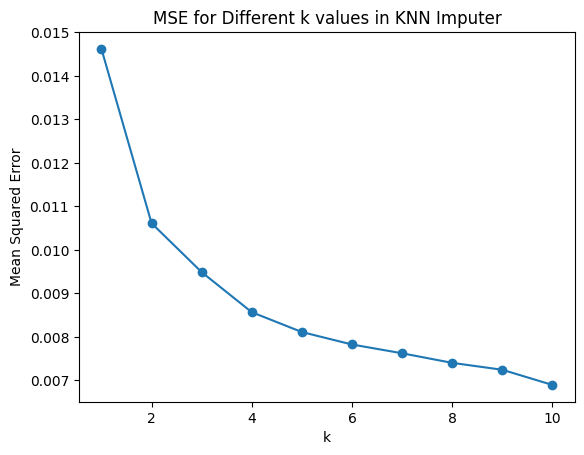

(10, np.float64(0.00689352262982169))

In [45]:
find_best_k_for_knn_imputer(f4.iloc[:,1:])

Best k: 10 with MSE: 0.006200561814228538


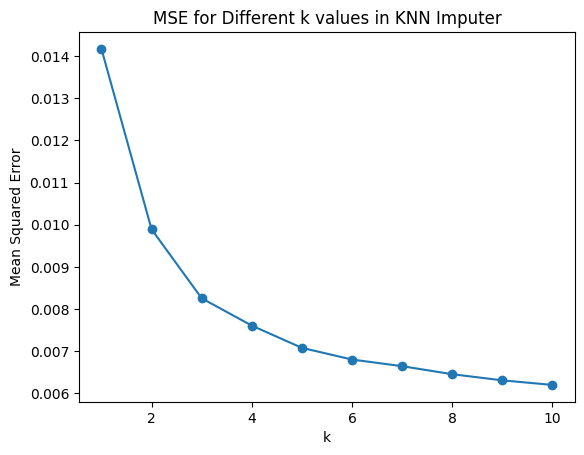

(10, np.float64(0.006200561814228538))

In [52]:
find_best_k_for_knn_imputer(f5.iloc[:,1:])

Best k: 10 with MSE: 0.007516578995014044


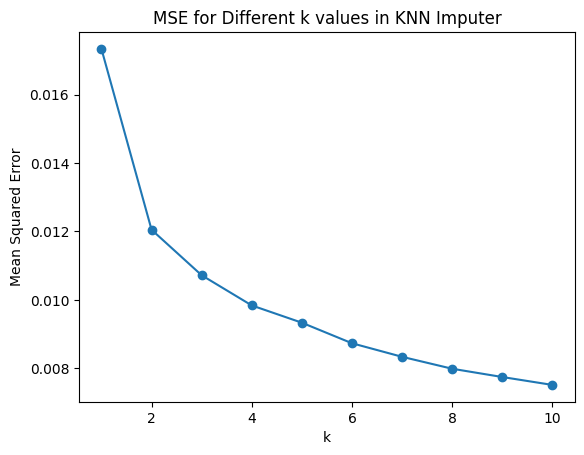

(10, np.float64(0.007516578995014044))

In [53]:
find_best_k_for_knn_imputer(f6.iloc[:,1:])

Best k: 10 with MSE: 0.03195387080212756


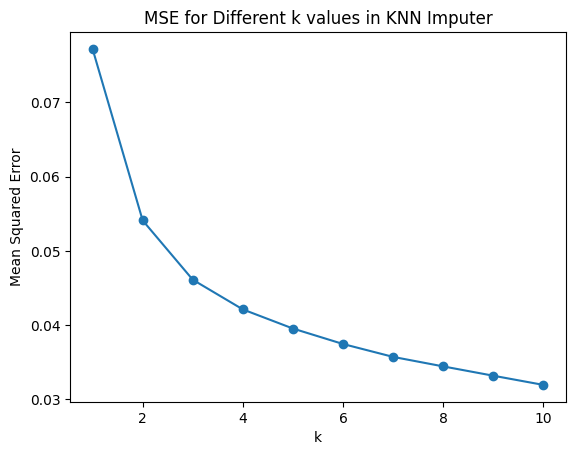

(10, np.float64(0.03195387080212756))

In [54]:
find_best_k_for_knn_imputer(q1.iloc[:,1:])

Best k: 10 with MSE: 0.03157175315373489


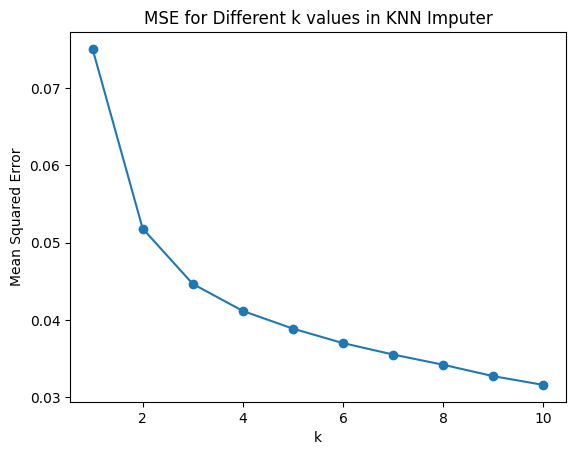

(10, np.float64(0.03157175315373489))

In [55]:
find_best_k_for_knn_imputer(q2.iloc[:,1:])

Best k: 10 with MSE: 0.02990852399341056


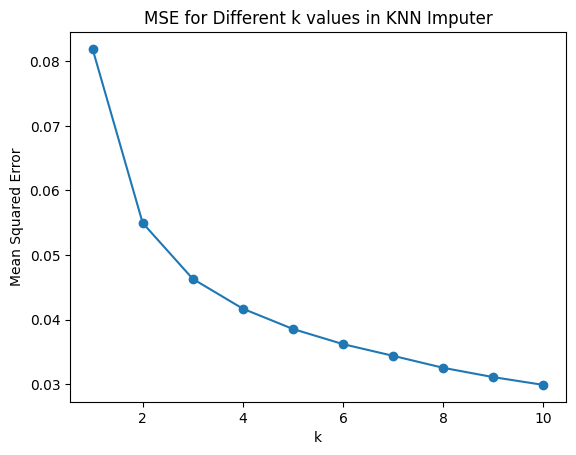

(10, np.float64(0.02990852399341056))

In [56]:
find_best_k_for_knn_imputer(q3.iloc[:,1:])

Best k: 10 with MSE: 0.02904592885042789


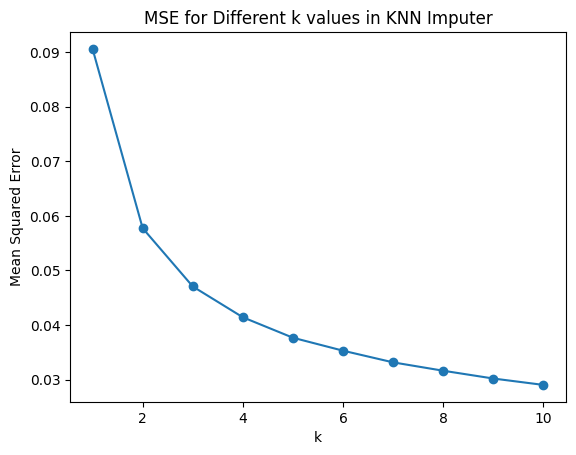

(10, np.float64(0.02904592885042789))

In [57]:
find_best_k_for_knn_imputer(q4.iloc[:,1:])

Best k: 10 with MSE: 0.026015788404924974


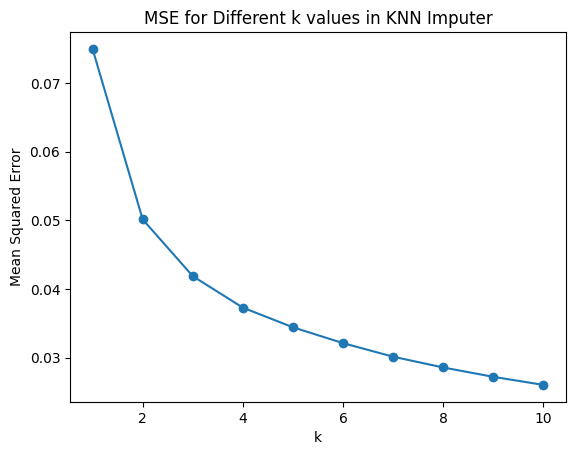

(10, np.float64(0.026015788404924974))

In [58]:
find_best_k_for_knn_imputer(q5.iloc[:,1:])

Best k: 10 with MSE: 0.21342295151230886


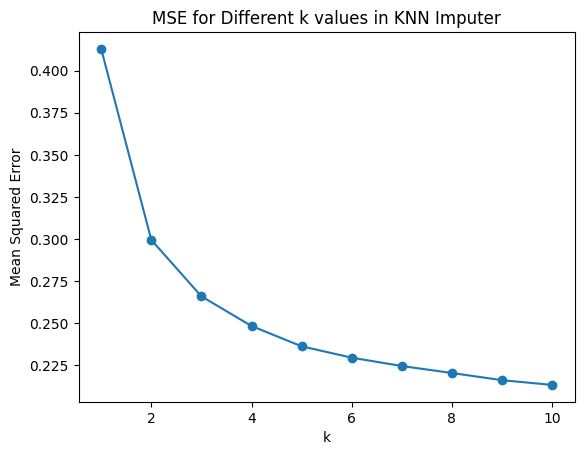

(10, np.float64(0.21342295151230886))

In [59]:
find_best_k_for_knn_imputer(q6.iloc[:,1:], missing_percentage = 0.25)

Best k: 10 with MSE: 0.0286283390895289


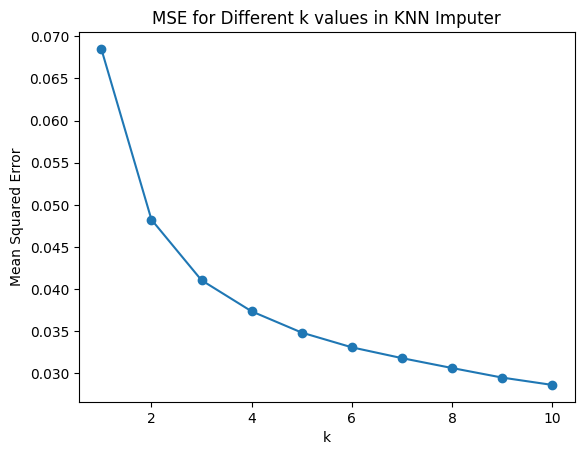

(10, np.float64(0.0286283390895289))

In [60]:
find_best_k_for_knn_imputer(q8.iloc[:,1:])

In [61]:
def impute_with_knn(df, datetime_col_name, n_neighbors=4, scale_data=True):
    """
    Perform KNN imputation on a DataFrame, excluding the datetime column,
    and then reattach the datetime column to the imputed DataFrame. Optionally scales the data.
    
    Parameters:
    - df (pd.DataFrame): The input DataFrame with missing values.
    - datetime_col_name (str): The name of the column containing datetime values.
    - n_neighbors (int): The number of neighbors to use for KNN imputation.
    - scale_data (bool): Whether to scale the data before imputation. Default is True.
    
    Returns:
    - imputed_df (pd.DataFrame): The DataFrame with imputed values and datetime column reattached.
    """
    
    # Check if the datetime column exists in the DataFrame
    if datetime_col_name not in df.columns:
        raise ValueError(f"Column '{datetime_col_name}' not found in the DataFrame")
    
    # Separate the datetime column from the rest of the DataFrame
    datetime_col = df[datetime_col_name]
    data_to_impute = df.drop(columns=datetime_col_name)
    
    # Initialize the scaler
    if scale_data:
        scaler = StandardScaler()
        data_to_impute_scaled = scaler.fit_transform(data_to_impute)
    else:
        data_to_impute_scaled = data_to_impute.values
    
    # Initialize KNNImputer
    imputer = KNNImputer(n_neighbors=n_neighbors)
    
    # Perform imputation on the scaled data
    imputed_data_scaled = imputer.fit_transform(data_to_impute_scaled)
    
    # If scaling was applied, reverse the scaling
    if scale_data:
        imputed_data = scaler.inverse_transform(imputed_data_scaled)
    else:
        imputed_data = imputed_data_scaled
    
    # Convert the numpy array back to a DataFrame
    imputed_df = pd.DataFrame(imputed_data, columns=data_to_impute.columns)
    
    # Add the datetime column back
    imputed_df[datetime_col_name] = datetime_col.values
    
    # Reorder columns to place the datetime column back in its original position
    imputed_df = imputed_df[[datetime_col_name] + [col for col in imputed_df.columns if col != datetime_col_name]]
    
    return imputed_df

In [62]:
#############################################################################################
# Imputing missing values in the data using KNN imputer
#############################################################################################

q1_knn = impute_with_knn(q1,"date_time",n_neighbors=5)
q2_knn = impute_with_knn(q2,"date_time",n_neighbors=5)
q3_knn = impute_with_knn(q3,"date_time",n_neighbors=5)
q4_knn = impute_with_knn(q4,"date_time",n_neighbors=5)
q5_knn = impute_with_knn(q5,"date_time",n_neighbors=5)
q6_knn = impute_with_knn(q6,"date_time",n_neighbors=5)
q7_knn = impute_with_knn(q7,"date_time",n_neighbors=5)
q8_knn = impute_with_knn(q8,"date_time",n_neighbors=5)

f1_knn = impute_with_knn(f1,"Time", n_neighbors=5)
f2_knn = impute_with_knn(f2,"Time", n_neighbors=5)
f3_knn = impute_with_knn(f3,"Time", n_neighbors=5)
f4_knn = impute_with_knn(f4,"Time", n_neighbors=5)
f5_knn = impute_with_knn(f5,"Time", n_neighbors=5)
f6_knn = impute_with_knn(f6,"Time", n_neighbors=6)

In [63]:
def get_imputed_values(df_original, df_imputed, column_name):
    """
    Extracts the imputed values of a specific column from the imputed dataset.
    
    Parameters:
    - df_original: DataFrame with missing values.
    - df_imputed: DataFrame with imputed values.
    - column_name: str, the name of the column of interest.

    Returns:
    - imputed_values: DataFrame containing the indices and imputed values.
    """
    # Find the indices where the original data was NaN
    missing_indices = df_original[column_name].isna()

    # Extract the corresponding values from the imputed DataFrame
    imputed_values = df_imputed.loc[missing_indices, column_name]

    # Returning a DataFrame with index and imputed values for clarity
    return pd.DataFrame({'Index': imputed_values.index, 'Imputed Value': imputed_values})


In [64]:
def plot_imputed_column_seaborn(original_df, imputed_df, column_name, time_col, name_df):
    """
    Plots the specified column from the original DataFrame along with the imputed data,
    and highlights the imputed points as distinct markers using seaborn.

    Parameters:
    - original_df (pd.DataFrame): The original DataFrame with missing values.
    - imputed_df (pd.DataFrame): The DataFrame with imputed values.
    - column_name (str): The name of the column to plot.
    - time_col (str): The name of the time column in both DataFrames.
    """
    
    # Check if the column and time column exist in both DataFrames
    if column_name not in original_df.columns or column_name not in imputed_df.columns:
        raise ValueError(f"Column '{column_name}' must be present in both DataFrames.")
    
    if time_col not in original_df.columns or time_col not in imputed_df.columns:
        raise ValueError(f"Time column '{time_col}' must be present in both DataFrames.")
    
    # Create a mask to identify where the original data is missing (NaN)
    missing_mask = original_df[column_name].isna()

    # Identify the points that were imputed
    imputed_points = imputed_df[missing_mask]

    # Plotting
    plt.figure(figsize=(12, 6))

    # Plot the original data
    sns.lineplot(data=original_df, 
                 x=time_col, y=column_name, label='Original Data', color='black', linestyle='-', alpha=0.7)
    
    # Highlight the imputed points with a distinct marker
    if not imputed_points.empty:
        sns.scatterplot(data=imputed_points, 
                        x=time_col, y=column_name, color='red', label='Imputed Points', marker='X', s=100)

    plt.xlabel('Time')
    plt.ylabel('Values')
    plt.title(f'{column_name} with Imputed Points')
    plt.legend()
    plt.grid(True)

    plt.savefig(f'plots/{name_df}_{column_name}.png', dpi=600, bbox_inches='tight')

    plt.show()


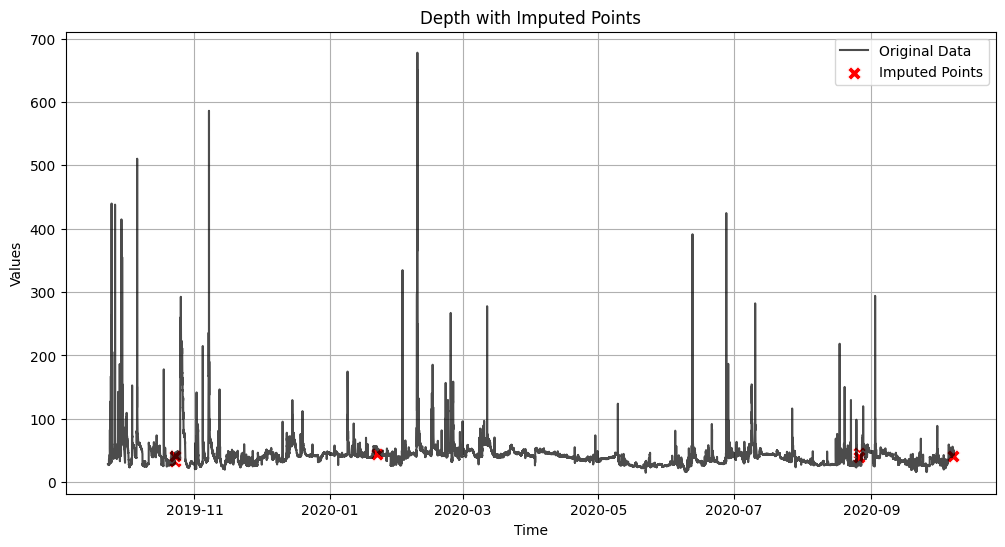

In [65]:
#############################################################################################
# Plotting the flow data with imputed values 
#############################################################################################

plot_imputed_column_seaborn(f2,f2_knn,"Depth", "Time","f2")

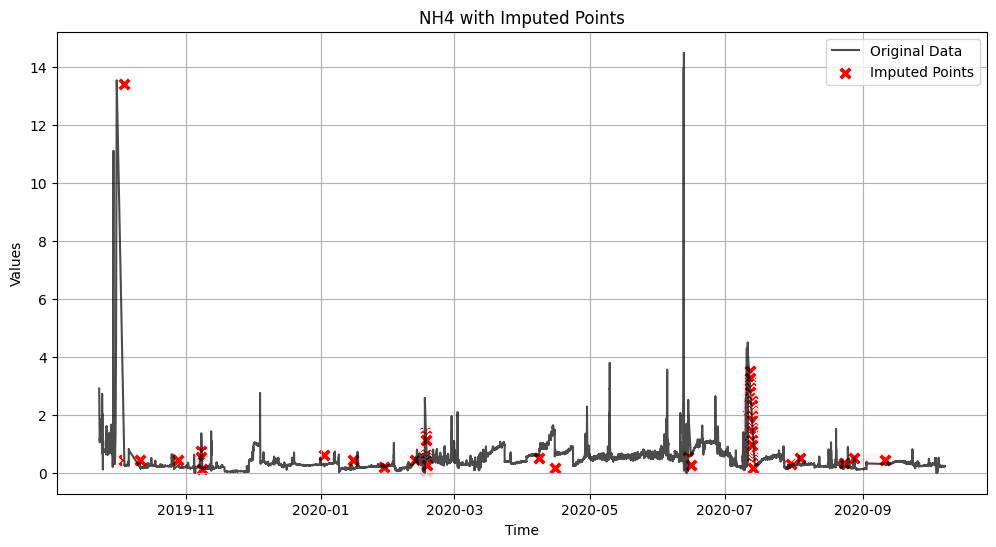

In [66]:
#############################################################################################
# Plotting the quality data with imputed values
#############################################################################################

plot_imputed_column_seaborn(q6,q6_knn,"NH4", "date_time","q6")

In [68]:
#############################################################################################
# Saving the imputed dataframes for further analyses
#############################################################################################

f1_knn.to_csv("data/f1_knn.csv", index=False)
f2_knn.to_csv("data/f2_knn.csv", index=False)
f3_knn.to_csv("data/f3_knn.csv", index=False)
f4_knn.to_csv("data/f4_knn.csv", index=False)
f5_knn.to_csv("data/f5_knn.csv", index=False)
f6_knn.to_csv("data/f6_knn.csv", index=False)

q1_knn.to_csv("data/q1_knn.csv",index=False)
q2_knn.to_csv("data/q2_knn.csv",index=False)
q3_knn.to_csv("data/q3_knn.csv",index=False)
q4_knn.to_csv("data/q4_knn.csv",index=False)
q5_knn.to_csv("data/q5_knn.csv",index=False)
q6_knn.to_csv("data/q6_knn.csv",index=False)
q7_knn.to_csv("data/q7_knn.csv",index=False)
q8_knn.to_csv("data/q8_knn.csv",index=False)